# Pew Research Center's Religious Landscape Study

In this notebook you will clean and wrangle a dataset that has come out of the Pew Research Center's [Religious Landscape Study](http://www.pewforum.org/religious-landscape-study/). The actual dataset used comes from Hadley Wickham's [Tidy Data Repository](https://github.com/hadley/tidy-data).

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

## Read in the data

Here, we read in the data using `read_csv`:

In [2]:
df = pd.read_csv('/data/tidy-data/data/pew.csv')

Extract the following columns and rename them:

* `q16`
* `reltrad` -> `religion`
* `income`

In [3]:
df = df[list(['q16', 'reltrad', 'income'])]

In [4]:
df.columns=['q16', 'religion', 'income']

In [5]:
df.head()

,q16,religion,income
0,Protestant,Evangelical Protestant Churches,"75 to under $100,000"
1,Protestant,Mainline Protestant Churches,"20 to under $30,000"
2,Protestant,Mainline Protestant Churches,"30 to under $40,000"
3,Nothing in particular,Unaffiliated,"Less than $10,000"
4,Jewish (Judaism),Jewish,"50 to under $75,000"


In [6]:
assert list(df.columns)==['q16', 'religion', 'income']
assert len(df)==35556

## Religion

Now you are going to tidy up the `religion` column. Perform the following transformations of the `religion` column:

* Replace `'Churches'` by an empty string
* Replace `'Protestant'` by `'Prot'`
* For the rows that have `" Atheist (do not believe in God) "` in the `q16` column, put the value `'Atheist'` in the
  `religion` column
* For rows that have `" Agnostic (not sure if there is a God) "` in the `q16` column, put the value `'Agnostic'` in the `religion` column
* For rows that have the phrase `"(no information on religious affiliation)"`, replace their value by `'Unknown'`
* Strip leading and trailing whitespace

In [7]:
df['religion'] = df['religion'].replace(to_replace='Churches',value='', regex=True)

In [8]:
df['religion'] = df['religion'].replace(to_replace='Protestant',value='Prot', regex=True)

In [9]:
df['q16'] = df['q16'].str.strip()

In [10]:
df.loc[df.q16 == 'Atheist (do not believe in God)', ['religion']] = 'Atheist'

In [11]:
df.loc[df.q16 == 'Agnostic (not sure if there is a God)', ['religion']] = 'Agnostic'

In [12]:
df['religion'] = df['religion'].str.replace('^.*?\)','Unknown')

In [13]:
df['religion'] = df['religion'].str.strip()

In [14]:
list(df['religion'].unique())

['Evangelical Prot',
 'Mainline Prot',
 'Unaffiliated',
 'Jewish',
 'Unknown',
 'Other Faiths',
 'Historically Black Prot',
 "Jehovah's Witness",
 'Atheist',
 'Agnostic',
 'Catholic',
 'Buddhist',
 'Mormon',
 'Muslim',
 'Hindu',
 'Other Christian',
 'Orthodox',
 'Other World Religions']

In [15]:
assert list(df['religion'].unique()) == \
['Evangelical Prot',
 'Mainline Prot',
 'Unaffiliated',
 'Jewish',
 'Unknown',
 'Other Faiths',
 'Historically Black Prot',
 "Jehovah's Witness",
 'Atheist',
 'Agnostic',
 'Catholic',
 'Buddhist',
 'Mormon',
 'Muslim',
 'Hindu',
 'Other Christian',
 'Orthodox',
 'Other World Religions']

Now do the following:

* Extract out just the `religion` and `income` columns
* Convert the `religion` column to a categorical type

In [16]:
df = df[list(['religion', 'income'])]

In [17]:
df['religion']=df['religion'].astype('category')

In [18]:
df.head()

,religion,income
0,Evangelical Prot,"75 to under $100,000"
1,Mainline Prot,"20 to under $30,000"
2,Mainline Prot,"30 to under $40,000"
3,Unaffiliated,"Less than $10,000"
4,Jewish,"50 to under $75,000"


In [19]:
assert list(df.columns)==['religion', 'income']
assert df.religion.dtype.name=='category'

Now make an appropriately labeled Seaborn `countplot` of the `religion` column on the y-axis, sorted by the number of people in each religion.

In [20]:
df=df.sort_values("religion", ascending=False)

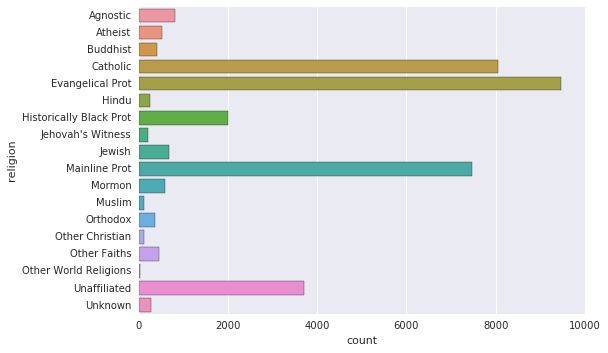

In [21]:
sns.countplot(y='religion', data=df)

## Income

Now work on the `income` column. Replace the existing income strings by the ones in the tests below:

In [22]:
df['income'].head()

10247          50 to under $75,000
30227    Don't know/Refused (VOL.)
8316           10 to under $20,000
24599          40 to under $50,000
24600    Don't know/Refused (VOL.)
Name: income, dtype: object

In [23]:
df['income'] = df['income'].replace(to_replace='^',value='$', regex=True)

In [24]:
df['income'] = df['income'].replace(to_replace=' to under \$',value='-', regex=True)

In [25]:
df['income'] = df['income'].replace(to_replace='\$Less than ',value='<', regex=True)

In [26]:
df['income'] = df['income'].replace(to_replace='^\$\$150,000 or more',value='>150,000', regex=True)

In [27]:
df['income'] = df['income'].replace(to_replace=',000',value='k', regex=True)

In [28]:
df['income'] = df['income'].str.replace('^.*?\)','Unknown')

In [29]:
df=df.sort_index()

In [30]:
list(df.income.unique())

['$75-100k',
 '$20-30k',
 '$30-40k',
 '<$10k',
 '$50-75k',
 '>150k',
 '$40-50k',
 'Unknown',
 '$100-150k',
 '$10-20k']

In [31]:
assert list(df.income.unique())==\
    ['$75-100k',
     '$20-30k',
     '$30-40k',
     '<$10k',
     '$50-75k',
     '>150k',
     '$40-50k',
     'Unknown',
     '$100-150k',
     '$10-20k']

Convert the `income` column to a category type:

In [32]:
df['income']=df['income'].astype('category')

In [33]:
assert df.income.dtype.name=='category'

Mow make an approprately labeled `countplot` of the `income` column, ordered by the income level:

In [34]:
df = df.sort_values('income')

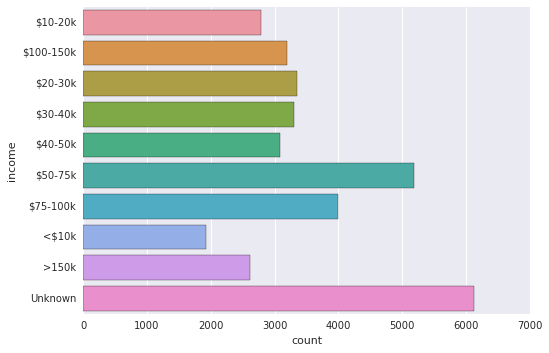

In [35]:
sns.countplot(y='income',data=df)

## Simple Analysis

Using a `groupby` and custom aggregation do the following:

* Extract rows where the income is not `'Unknown'`
* Compute the most commonly occuring income category for each religion (mode)
* Sort the result by the mode income
* Store the result in a single-column `DataFrame` with an index that is the religion and a column name of `mode_income`

In [36]:
df = df[df['income'] !='Unknown']

In [37]:
df = df.groupby('religion')['income'].value_counts()

In [38]:
df.idxmax()

('Evangelical Prot', '$50-75k')

In [41]:
df = pd.DataFrame(df)

In [43]:
df.columns=['mode_income']

In [44]:
df

mode_income
religion              income                
Agnostic              $50-75k            137
                      $75-100k           122
                      $100-150k          109
                      >150k               84
                      $30-40k             81
                      $40-50k             76
                      $20-30k             60
                      $10-20k             34
                      <$10k               27
Atheist               >150k               74
                      $75-100k            73
                      $50-75k             70
                      $100-150k           59
                      $30-40k             52
                      $20-30k             37
                      $40-50k             35
                      $10-20k             27
                      <$10k               12
Buddhist              $75-100k            62
                      $50-75k             58
                      >150k               53
                      $100-150k           39
                      $30-40k             34
                      $40-50k             33
                      $20-30k             30
                      <$10k               27
                      $10-20k             21
Catholic              $50-75k           1116
                      $75-100k           949
                      $100-150k          792
...                                      ...
Other Faiths          $20-30k             40
                      $10-20k             33
                      <$10k               20
Other World Religions $50-75k              7
                      <$10k                5
                      $100-150k            4
                      $30-40k              4
                      >150k                4
                      $20-30k              3
                      $75-100k             3
                      $10-20k              2
                      $40-50k              2
Unaffiliated          $50-75k            528
                      $75-100k           407
                      $20-30k            374
                      $30-40k            365
                      $40-50k            341
                      $100-150k          321
                      $10-20k            299
                      >150k              258
                      <$10k              217
Unknown               $50-75k             35
                      $75-100k            21
                      >150k               18
                      $100-150k           17
                      $20-30k             15
                      <$10k               15
                      $10-20k             14
                      $30-40k             11
                      $40-50k             10

[162 rows x 1 columns]